In [44]:
import plaid
import os
import datetime
import pandas as pd
import json

In [2]:
type(os.getenv('PLAID_CLIENT_ID'))

str

In [3]:
# Bring env variables into Python and store in variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")

In [4]:
# Confirm length of env variable is greater than zero
print(len(PLAID_CLIENT_ID))
print(len(PLAID_PUBLIC_KEY))
print(len(PLAID_SBX_SECRET_KEY))

24
30
30


In [5]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [28]:
# Select an institution for processing
INSTITUTION_ID = "ins_109512"

# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']

In [ ]:
# Get accounts associated with institution
client.Accounts.get(access_token)

In [29]:
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

# Get institutions
client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112062',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Constitution Bank - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',


In [30]:
# Extract Transactions with date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)

# Iterate and parse JSON response
#for transactions in transactions_response['transactions']:
    #if transactions['name'] == 'INTRST PYMNT':
       # print(json.dumps(transactions['amount'], indent=4, sort_keys=True))

In [19]:
transactions_response['transactions'][0]

{'account_id': 'M5kXpXe8K6I5ZeoNj41ncJZ6vamo3Ri9VgMW3',
 'account_owner': None,
 'amount': 500,
 'authorized_date': None,
 'category': ['Food and Drink', 'Restaurants'],
 'category_id': '13005000',
 'date': '2020-04-25',
 'iso_currency_code': 'USD',
 'location': {'address': None,
  'city': None,
  'country': None,
  'lat': None,
  'lon': None,
  'postal_code': None,
  'region': None,
  'store_number': None},
 'name': 'Tectra Inc',
 'payment_channel': 'in store',
 'payment_meta': {'by_order_of': None,
  'payee': None,
  'payer': None,
  'payment_method': None,
  'payment_processor': None,
  'ppd_id': None,
  'reason': None,
  'reference_number': None},
 'pending': False,
 'pending_transaction_id': None,
 'transaction_code': None,
 'transaction_id': 'jlozjzMW8NTANKkD3xZBCMgB6G4gkec1qgX7G',
 'transaction_type': 'place',
 'unofficial_currency_code': None}

In [20]:
transactions_response['transactions'][0]['name']

'Tectra Inc'

In [36]:
transactions_response['transactions'][0]['category'][0]

'Food and Drink'

In [37]:
# Create Lists
transactions_date=[]
transactions_name=[]
transactions_amount=[]
transactions_category=[]

In [38]:
for transactions in transactions_response['transactions']:
    transactions_amount.append((transactions['amount']))
print(transactions_amount)

[500, 2078.5, 500, 500, 25, 5.4, 5850, 1000, 78.5, -500, 12, 4.33, 89.4, -4.22, 500, 6.33, 500, 2078.5, 500, 500, 25, 5.4, 5850, 1000, 78.5, -500, 12, 4.33, 89.4, -4.22, 500, 6.33, 500, 2078.5, 500, 500, 25, 5.4, 5850, 1000, 78.5, -500, 12, 4.33, 89.4, -4.22, 500, 6.33, 500, 2078.5, 500, 500, 25, 5.4, 5850, 1000, 78.5, -500, 12, 4.33, 89.4, -4.22, 500, 6.33, 500, 2078.5, 500, 500, 25, 5.4, 5850, 1000, 78.5, -500, 12, 4.33, 89.4, -4.22, 500, 6.33, 500, 2078.5, 500, 500, 25, 5.4, 5850, 1000, 78.5, -500, 12, 4.33, 89.4, -4.22, 500, 6.33, 500, 2078.5, 500, 500]


In [40]:
for transactions in transactions_response['transactions']:
    transactions_name.append((transactions['name']))
print(transactions_name)

['Tectra Inc', 'AUTOMATIC PAYMENT - THANK', 'KFC', 'Madison Bicycle Shop', 'CREDIT CARD 3333 PAYMENT *//', 'Uber', 'ACH Electronic CreditGUSTO PAY 123456', 'CD DEPOSIT .INITIAL.', 'Touchstone Climbing', 'United Airlines', "McDonald's", 'Starbucks', 'SparkFun', 'INTRST PYMNT', 'United Airlines', 'Uber', 'Tectra Inc', 'AUTOMATIC PAYMENT - THANK', 'KFC', 'Madison Bicycle Shop', 'CREDIT CARD 3333 PAYMENT *//', 'Uber', 'ACH Electronic CreditGUSTO PAY 123456', 'CD DEPOSIT .INITIAL.', 'Touchstone Climbing', 'United Airlines', "McDonald's", 'Starbucks', 'SparkFun', 'INTRST PYMNT', 'United Airlines', 'Uber', 'Tectra Inc', 'AUTOMATIC PAYMENT - THANK', 'KFC', 'Madison Bicycle Shop', 'CREDIT CARD 3333 PAYMENT *//', 'Uber', 'ACH Electronic CreditGUSTO PAY 123456', 'CD DEPOSIT .INITIAL.', 'Touchstone Climbing', 'United Airlines', "McDonald's", 'Starbucks', 'SparkFun', 'INTRST PYMNT', 'United Airlines', 'Uber', 'Tectra Inc', 'AUTOMATIC PAYMENT - THANK', 'KFC', 'Madison Bicycle Shop', 'CREDIT CARD 333

In [41]:
for transactions in transactions_response['transactions']:
    transactions_date.append((transactions['date']))
print(transactions_date)

['2020-04-25', '2020-04-24', '2020-04-24', '2020-04-24', '2020-04-15', '2020-04-15', '2020-04-14', '2020-04-14', '2020-04-13', '2020-04-13', '2020-04-12', '2020-04-12', '2020-04-11', '2020-04-10', '2020-03-31', '2020-03-29', '2020-03-26', '2020-03-25', '2020-03-25', '2020-03-25', '2020-03-16', '2020-03-16', '2020-03-15', '2020-03-15', '2020-03-14', '2020-03-14', '2020-03-13', '2020-03-13', '2020-03-12', '2020-03-11', '2020-03-01', '2020-02-28', '2020-02-25', '2020-02-24', '2020-02-24', '2020-02-24', '2020-02-15', '2020-02-15', '2020-02-14', '2020-02-14', '2020-02-13', '2020-02-13', '2020-02-12', '2020-02-12', '2020-02-11', '2020-02-10', '2020-01-31', '2020-01-29', '2020-01-26', '2020-01-25', '2020-01-25', '2020-01-25', '2020-01-16', '2020-01-16', '2020-01-15', '2020-01-15', '2020-01-14', '2020-01-14', '2020-01-13', '2020-01-13', '2020-01-12', '2020-01-11', '2020-01-01', '2019-12-30', '2019-12-27', '2019-12-26', '2019-12-26', '2019-12-26', '2019-12-17', '2019-12-17', '2019-12-16', '2019

In [42]:
for transactions in transactions_response['transactions']:
    transactions_category.append((transactions['category']))
print(transactions_category)


[['Food and Drink', 'Restaurants'], ['Payment'], ['Food and Drink', 'Restaurants', 'Fast Food'], ['Shops', 'Sporting Goods'], ['Payment', 'Credit Card'], ['Travel', 'Taxi'], ['Transfer', 'Debit'], ['Transfer', 'Deposit'], ['Recreation', 'Gyms and Fitness Centers'], ['Travel', 'Airlines and Aviation Services'], ['Food and Drink', 'Restaurants', 'Fast Food'], ['Food and Drink', 'Restaurants', 'Coffee Shop'], ['Food and Drink', 'Restaurants'], ['Transfer', 'Credit'], ['Travel', 'Airlines and Aviation Services'], ['Travel', 'Taxi'], ['Food and Drink', 'Restaurants'], ['Payment'], ['Food and Drink', 'Restaurants', 'Fast Food'], ['Shops', 'Sporting Goods'], ['Payment', 'Credit Card'], ['Travel', 'Taxi'], ['Transfer', 'Debit'], ['Transfer', 'Deposit'], ['Recreation', 'Gyms and Fitness Centers'], ['Travel', 'Airlines and Aviation Services'], ['Food and Drink', 'Restaurants', 'Fast Food'], ['Food and Drink', 'Restaurants', 'Coffee Shop'], ['Food and Drink', 'Restaurants'], ['Transfer', 'Credit'

In [57]:
df_amount = pd.DataFrame(transactions_amount)

In [62]:
df_name = pd.DataFrame(transactions_name)

In [93]:
df_category = pd.DataFrame(transactions_category)[0]

In [94]:
df_date = pd.DataFrame(transactions_date)

In [98]:
# Concatenate data
plaid_df = (
    pd.concat((df_date,df_amount,df_name, df_category), axis=1).dropna()
)

In [99]:
plaid_df.head(5)

,0,0,0,0
0,2020-04-25,500.0,Tectra Inc,Food and Drink
1,2020-04-24,2078.5,AUTOMATIC PAYMENT - THANK,Payment
2,2020-04-24,500.0,KFC,Food and Drink
3,2020-04-24,500.0,Madison Bicycle Shop,Shops
4,2020-04-15,25.0,CREDIT CARD 3333 PAYMENT *//,Payment


In [101]:
plaid_df.columns = ['Date','Amount','Name','Category']

In [102]:
plaid_df.head(5)

,Date,Amount,Name,Category
0,2020-04-25,500.0,Tectra Inc,Food and Drink
1,2020-04-24,2078.5,AUTOMATIC PAYMENT - THANK,Payment
2,2020-04-24,500.0,KFC,Food and Drink
3,2020-04-24,500.0,Madison Bicycle Shop,Shops
4,2020-04-15,25.0,CREDIT CARD 3333 PAYMENT *//,Payment


Text(0.5, 1.0, 'Budget')

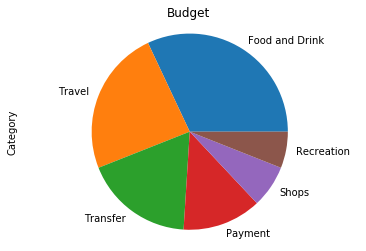

In [181]:
plaid_df.Category.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Budget')

In [ ]:
# Retirement Planner

In [161]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi

%matplotlib inline

In [162]:
# Set Alpaca API key and secret
# Bring env variables into Python and store in variables
from dotenv import load_dotenv
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [163]:
type(os.getenv('ALPACA_API_KEY'))

str

In [164]:
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [165]:
# Set the list of tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2019-12-02 00:00:00-05:00  112.31  112.5100  112.29  112.48  5731792  314.59   
2019-12-03 00:00:00-05:00  112.80  113.1277  112.76  113.02  3547417  308.65   
2019-12-04 00:00:00-05:00  112.87  112.9500  112.68  112.80  3547118  310.70   
2019-12-05 00:00:00-05:00  112.58  112.7400  112.53  112.69  3052489  312.23   
2019-12-06 00:00:00-05:00  112.47  112.6800  112.41  112.54  4065089  314.12   

                                                             
                             high     low   close    volume  
time                                                         
2019-12-02 00:00:00-05:00  314.66  311.17  311.60  62704749  
2019-12-03 00:00:00-05:00  309.64  307.13  309.47  62363983  
2019-12-04 00:00:00-05:00  312.12  310.32  311.47  37810887  
2019-12-05 00:00:00-05:00  312.25  310.58  312.05  34436972  
2019-12-06 00:00:00-05:00  315.31  314.11  314.84  37930796

In [166]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,AGG,SPY
,close,close
time,,
2019-12-02 00:00:00-05:00,112.48,311.60
2019-12-03 00:00:00-05:00,113.02,309.47
2019-12-04 00:00:00-05:00,112.80,311.47
2019-12-05 00:00:00-05:00,112.69,312.05
2019-12-06 00:00:00-05:00,112.54,314.84


In [167]:
# Use the `pct_change` function to calculate daily returns of `JNJ` and `MU`.
daily_returns = df.pct_change()
daily_returns.head()

,AGG,SPY
,close,close
time,,
2019-12-02 00:00:00-05:00,NaN,NaN
2019-12-03 00:00:00-05:00,0.004801,-0.006836
2019-12-04 00:00:00-05:00,-0.001947,0.006463
2019-12-05 00:00:00-05:00,-0.000975,0.001862
2019-12-06 00:00:00-05:00,-0.001331,0.008941


In [168]:
# Use the `mean` function to calculate the mean of daily returns for `SPY` and `AGG`, respectively
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_agg

0.00046424058478946055

In [169]:
avg_daily_return_spy

-0.0005024303966304052

In [170]:
# Use the `std` function to calculate the standard deviation of daily returns for `SPY` and `AGG`, respectively
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_agg

0.008485943680615756

In [171]:
# Set number of simulations and trading days
num_simulations = 1000
num_trading_days = 252

# Set last closing prices of `SPY` and `AGG`
spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002785,0.973631,0.996381,0.991710,1.014709,1.011829,1.001336,1.028385,0.968927,0.962706,...,0.971682,0.982580,0.964657,0.982358,0.997626,1.030199,0.995412,0.989835,1.009949,0.984221
2,1.008193,0.975348,0.992211,1.024168,1.028579,1.007280,1.003977,1.034542,0.953223,0.939528,...,0.977849,1.006156,0.915584,0.989159,0.999272,1.039527,0.979563,1.021967,1.000038,0.962705
3,0.995937,0.970346,0.983928,1.023633,1.011091,1.014038,0.990972,1.070776,0.957750,0.938506,...,0.988889,0.990614,0.914121,0.968650,0.981449,1.062041,0.971077,1.027567,0.992527,0.980259
4,1.007181,0.962080,0.984869,1.043466,1.016416,1.006383,1.023880,1.075289,0.954385,0.974827,...,0.980552,0.973983,0.916069,0.953519,0.944252,1.057897,0.990670,1.005585,1.008501,0.971304


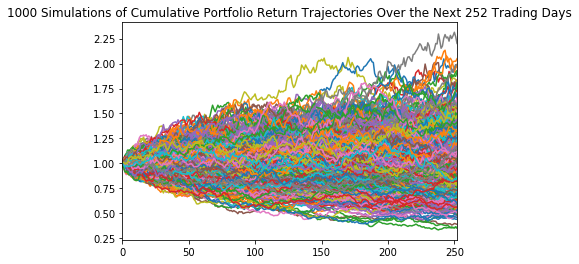

In [172]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the portfolio based on 252 trading days
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [173]:
# Select the last row for project stock prices (prices of each simulation on the 252nd trading day)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    0.941193
1    0.896406
2    0.687519
3    0.822438
4    0.629484
Name: 252, dtype: float64

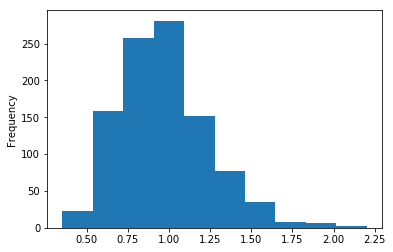

In [174]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
ending_cumulative_returns.plot(kind='hist', bins=10)

In [175]:
ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns)

(0.907, 1.092]    0.281
(0.722, 0.907]    0.258
(0.537, 0.722]    0.158
(1.092, 1.277]    0.152
(1.277, 1.462]    0.077
(1.462, 1.647]    0.035
(0.349, 0.537]    0.023
(1.647, 1.832]    0.008
(1.832, 2.017]    0.006
(2.017, 2.202]    0.002
Name: 252, dtype: float64

In [176]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = ending_cumulative_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.542050
0.975    1.564359
Name: 252, dtype: float64

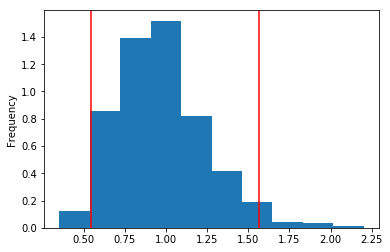

In [177]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [182]:
# Set initial investment
initial_investment = 20000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment + (initial_investment * confidence_interval.iloc[0])
investment_pnl_upper_bound = initial_investment + (initial_investment * confidence_interval.iloc[1])
                                                    
# Print the results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 252 trading days will end within in the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 252 trading days will end within in the range of $30841.006584156818 and $51287.18094867475
